In [48]:
import os
from pathlib import Path
from typing import Any, Dict, List, Tuple, Union
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
os.chdir(os.path.split(os.getcwd())[0]) # set working directory to Molli top level

import ase_utils as au
import gaussian_utils as GU
import metrics as ms
import utils as ut
from file_source import MultiItemFileSource
from trajectory_analyzer import TrajectoryAnalyzer


In [3]:
def get_functional_start_idx_from_file_name(file_name: str) -> int:
    functionals = ["pbe", "b3p", "tpss", "wb97", "bp86"]
    name = file_name.lower()
    idxs = [name.find(f) for f in functionals if name.find(f) >= 0]
    return min(idxs) if len(idxs) > 0 else -1

def extract_traj_name(traj_path: Path) -> str:
    start_idx = get_functional_start_idx_from_file_name(traj_path.stem)
    end_idx = traj_path.stem.find("_opt")
    return traj_path.stem[start_idx:end_idx].lower()

def get_base_and_traj_paths(search_dir: Path, base_file_name: str) -> Tuple[Path, List[Path]]:
    all_paths = ut.get_file_paths_in_dir(
        search_dir=search_dir,
        file_extension=".xyz"
        )

    base_path = [x for x in all_paths if x.name.lower() == base_file_name.lower()][0]
    traj_paths = [x for x in all_paths if x.name.lower() != base_file_name.lower()]

    return (base_path, traj_paths)

def create_traj_analyzer(
                        trajectories_dir: Path,
                        base_file_name: str,
                        description: str,
                        ) -> TrajectoryAnalyzer:

    base_path, traj_paths = get_base_and_traj_paths(
                                search_dir=trajectories_dir,
                                base_file_name=base_file_name
                                )


    base_trajectory = MultiItemFileSource(
        file_path=base_path,
        name=extract_traj_name(traj_path=base_path),
        item_idxs=num_steps
      )

    trajectories_to_compare = [
        MultiItemFileSource(
          file_path=x,
          name=extract_traj_name(traj_path=x),
          item_idxs=num_steps
          ) for x in traj_paths
      ]

    return TrajectoryAnalyzer(
                            description=description,
                            base_trajectory=base_trajectory,
                            trajectories_to_compare=trajectories_to_compare,
                            metric_functions=metric_funcs,
                          )
    

In [4]:
metric_funcs = [
  (ms.mad_of_positions, "mean_abs_dist"),
  (ms.rmsd_of_positions, "root_mean_of_sq_dist"),
  (ms.max_distance, "max_dist"),
]

num_steps = 10

In [84]:
###############################################################################
# mol24
###############################################################################

trajectories_dir = Path("C:/tmp/gaussian/optimization_trajectories/original")
base_file_name = "pbe1pbe_cc_pvtz_tzvpfit_opt_steps.xyz"
description = "original"

original_traj_analyzer = create_traj_analyzer(
        trajectories_dir=trajectories_dir,
        base_file_name=base_file_name,
        description=description
    )


In [85]:
###############################################################################
# mol24_ex16_crest5
###############################################################################

trajectories_dir = Path("C:/tmp/gaussian/optimization_trajectories/ex16_c5")
base_file_name = "ex16_c5_pbe1pbe_cc_pvtz_tzvpfit_opt_steps.xyz"
description = "ex16_c5"

ex16_c5_traj_analyzer = create_traj_analyzer(
        trajectories_dir=trajectories_dir,
        base_file_name=base_file_name,
        description=description
    )


In [86]:
###############################################################################
# mol24_ex19_crest23
###############################################################################

trajectories_dir = Path("C:/tmp/gaussian/optimization_trajectories/ex19_c23")
base_file_name="ex19_c23_pbe1pbe_cc_pvtz_tzvpfit_opt_steps.xyz"
description = "ex19_c23"

ex19_c23_traj_analyzer = create_traj_analyzer(
        trajectories_dir=trajectories_dir,
        base_file_name=base_file_name,
        description=description
    )


In [87]:
###############################################################################
# ex0a_c10
###############################################################################

trajectories_dir = Path("C:/tmp/gaussian/optimization_trajectories/ex0a_c10")
base_file_name="ex0a_c10_pbe1pbe_cc_pvtz_tzvpfit_opt_steps.xyz"
description = "ex0a_c10"

ex0a_c10_traj_analyzer = create_traj_analyzer(
        trajectories_dir=trajectories_dir,
        base_file_name=base_file_name,
        description=description
    )

###############################################################################
# ex0a_c24
###############################################################################

trajectories_dir = Path("C:/tmp/gaussian/optimization_trajectories/ex0a_c24")
base_file_name="ex0a_c24_pbe1pbe_cc_pvtz_tzvpfit_opt_steps.xyz"
description = "ex0a_c24"

ex0a_c24_traj_analyzer = create_traj_analyzer(
        trajectories_dir=trajectories_dir,
        base_file_name=base_file_name,
        description=description
    )

###############################################################################
# ex0a_c26
###############################################################################

trajectories_dir = Path("C:/tmp/gaussian/optimization_trajectories/ex0a_c26")
base_file_name="ex0a_c26_pbe1pbe_cc_pvtz_tzvpfit_opt_steps.xyz"
description = "ex0a_c26"

ex0a_c26_traj_analyzer = create_traj_analyzer(
        trajectories_dir=trajectories_dir,
        base_file_name=base_file_name,
        description=description
    )

###############################################################################
# ex0b_c21 
###############################################################################

trajectories_dir = Path("C:/tmp/gaussian/optimization_trajectories/ex0b_c21")
base_file_name="ex0b_c21_pbe1pbe_cc_pvtz_tzvpfit_opt_steps.xyz"
description = "ex0b_c21"

ex0b_c21_traj_analyzer = create_traj_analyzer(
        trajectories_dir=trajectories_dir,
        base_file_name=base_file_name,
        description=description
    )

###############################################################################
# ex0ff_c6
###############################################################################

trajectories_dir = Path("C:/tmp/gaussian/optimization_trajectories/ex0ff_c6")
base_file_name="ex0ff_c6_pbe1pbe_cc_pvtz_tzvpfit_opt_steps.xyz"
description = "ex0ff_c6"

ex0ff_c6_traj_analyzer = create_traj_analyzer(
        trajectories_dir=trajectories_dir,
        base_file_name=base_file_name,
        description=description
    )


In [88]:
traj_analyzer = original_traj_analyzer
#traj_analyzer = ex16_c5_traj_analyzer
#traj_analyzer = ex19_c23_traj_analyzer
#traj_analyzer = ex0a_c10_traj_analyzer

In [89]:
print(traj_analyzer.metrics.keys())
# 'mean_abs_dist', 'root_mean_of_sq_dist', 'max_dist'
#metric_key = "mean_abs_dist"
metric_key = "max_dist"


dict_keys(['mean_abs_dist', 'root_mean_of_sq_dist', 'max_dist'])


In [90]:
print(traj_analyzer.metrics[metric_key].keys())
# 'base_name', 'names_to_compare', 'to_base', 'to_base_future', 
# 'base_to_start', 'traj_to_start', 'base_incremental', 'traj_incremental'
traj_analyzer.metrics[metric_key]["names_to_compare"]


dict_keys(['base_name', 'names_to_compare', 'to_base', 'to_base_future', 'to_base_last_step', 'base_to_start', 'base_to_last', 'traj_to_start', 'base_incremental', 'traj_incremental'])


['b3p86_def2svpp_svpfit',
 'bp86_def2svpp_svpfit',
 'bp86_sto3g',
 'pbe1pbe_def2svpp_svpfit',
 'pbe1pbe_sto3g',
 'tpss_gd3_def2svpp_svpfit',
 'wb97xd_def2svpp_svpfit']

In [91]:
for i, traj_to_compare in enumerate(traj_analyzer.trajectories_to_compare):
  print(traj_analyzer.description)
  print(traj_to_compare.name, "diff to: ", traj_analyzer.base_trajectory.name)
  print(f"{metric_key} (angstroms)")
  print(np.round(traj_analyzer.metrics[metric_key]["to_base_last_step"][i], 2))
  print("-" * 80)


original
b3p86_def2svpp_svpfit diff to:  pbe1pbe_cc_pvtz_tzvpfit
max_dist (angstroms)
[0.57 1.3  1.14 1.29 1.36 2.29 2.4  2.44 2.44 2.44]
--------------------------------------------------------------------------------
original
bp86_def2svpp_svpfit diff to:  pbe1pbe_cc_pvtz_tzvpfit
max_dist (angstroms)
[0.57 1.28 1.38 2.41 2.59 2.65 2.68 3.19 3.22 3.16]
--------------------------------------------------------------------------------
original
bp86_sto3g diff to:  pbe1pbe_cc_pvtz_tzvpfit
max_dist (angstroms)
[0.57 0.71 0.82 2.06 3.17 3.52 3.57 3.51 3.51 3.51]
--------------------------------------------------------------------------------
original
pbe1pbe_def2svpp_svpfit diff to:  pbe1pbe_cc_pvtz_tzvpfit
max_dist (angstroms)
[0.57 0.83 1.35 1.42 1.83 2.74 2.73 2.84 2.7  2.7 ]
--------------------------------------------------------------------------------
original
pbe1pbe_sto3g diff to:  pbe1pbe_cc_pvtz_tzvpfit
max_dist (angstroms)
[0.57 0.78 1.7  1.56 1.45 1.51 1.54 1.54 1.55 1.55]
----

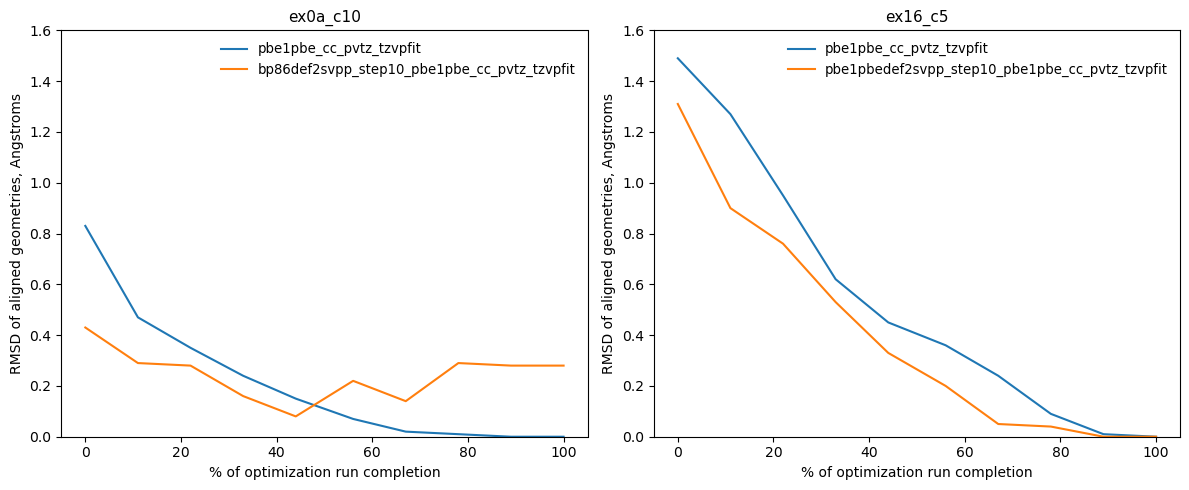

In [95]:
analyzers = [
    ex0a_c10_traj_analyzer,
    ex16_c5_traj_analyzer,
    # ex0ff_c6_traj_analyzer,
    # ex19_c23_traj_analyzer,
    # ex0a_c24_traj_analyzer,
    # ex0a_c26_traj_analyzer,
    # ex0b_c21_traj_analyzer,
    # original_traj_analyzer,
    ]

analyzer_names = [a.description for a in analyzers]

n = len(analyzer_names)
num_cols = 2
num_rows = n // num_cols if n % num_cols == 0 else n // num_cols + 1
figure_size = (num_cols * 6, num_rows * 5)

title = "Optimization trajectories comparison with pbe1pbe_cc_pvtz_tzvpfit"
x_label = "% of optimization run completion"
#y_label = "Avg distance between all corresponding atoms, Angstroms"
#metric_key = "mean_abs_dist"
y_label = "RMSD of aligned geometries, Angstroms"
metric_key = "root_mean_of_sq_dist"

# y_label = "Max distance between all corresponding atoms, Angstroms"
# metric_key = "max_dist"

#x = [f"{round(100 * x / (num_steps - 1), 0)}%" for x in range(num_steps)]
x = [round(100 * x / (num_steps - 1), 0) for x in range(num_steps)]

fig, axs = plt.subplots(num_rows, num_cols, figsize=figure_size)
for traj_analyzer, ax in zip(analyzers, axs.ravel()):
    y = np.round(traj_analyzer.metrics[metric_key]["base_to_last"], 2) # add base
    ax.plot(x, y, label=traj_analyzer.base_trajectory.name)

    for i, traj_to_compare in enumerate(traj_analyzer.trajectories_to_compare):
        y = np.round(traj_analyzer.metrics[metric_key]["to_base_last_step"][i], 2)
        ax.plot(x, y, label=traj_to_compare.name)

    ax.set_title(f"{traj_analyzer.description}", fontdict={"fontsize":11})
    #ax.set_title(f"{traj_analyzer.description} vs pbe1pbe_cc_pvtz_tzvpfit at convergence", fontdict={"fontsize":11})
    ax.set_xlabel(x_label)
    #ax.set_xticks([])
    ax.set_ylabel(y_label)
    #ax.legend(loc="upper left")
    #ax.legend(loc=(0, -0.25), ncol=1, mode="expand", edgecolor="white", fontsize=10, markerscale=1.75) #(0, -0.25)
    ax.legend(loc="upper right", ncol=1, edgecolor="white", fontsize=9.5, markerscale=1.75) #(0, -0.25)
    ax.sharey=True
    ax.set_ylim(ymin=0, ymax=1.6)

plt.tight_layout() #h_pad=6, w_pad=4)
#plt.suptitle(title, fontsize=12, y=1.04)
#plt.legend()
#plt.savefig(Path("C:/tmp/images/opt_traj_head_start.png"), format="png", dpi=100)

In [93]:
traj_analyzer = ex16_c5_traj_analyzer

df = pd.DataFrame()
metric_key = "root_mean_of_sq_dist"
vals_dict = traj_analyzer.metrics[metric_key]
base_col = vals_dict["base_name"]
df[base_col] = vals_dict["base_to_last"]
df[base_col] = round(df[base_col], 2)

for i, col in enumerate(vals_dict["names_to_compare"]):
    df[col] = vals_dict["to_base_last_step"][i]
    df[col] = round(df[col], 2)

df

,pbe1pbe_cc_pvtz_tzvpfit,pbe1pbedef2svpp_step10_pbe1pbe_cc_pvtz_tzvpfit
0,1.49,1.31
1,1.27,0.90
2,0.95,0.76
3,0.62,0.53
4,0.45,0.33
5,0.36,0.20
6,0.24,0.05
7,0.09,0.04
8,0.01,0.00
9,0.00,0.00


<AxesSubplot: >

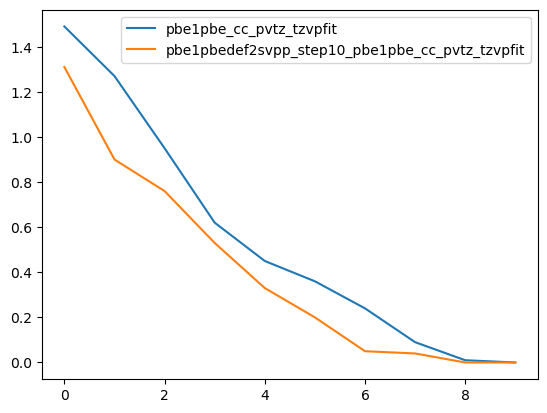

In [56]:
df.plot()

In [52]:
ex16_c5_traj_analyzer.metrics["root_mean_of_sq_dist"]

{'base_name': 'pbe1pbe_cc_pvtz_tzvpfit',
 'names_to_compare': ['pbe1pbedef2svpp_step10_pbe1pbe_cc_pvtz_tzvpfit'],
 'to_base': array([[0.49036142, 0.4075504 , 0.22417642, 0.16264032, 0.15933126,
         0.23063215, 0.25474368, 0.08339863, 0.01206619, 0.00133044]]),
 'to_base_future': array([[0.00133044, 0.00133044, 0.00133044, 0.00133044, 0.00133044,
         0.00133044, 0.00133044, 0.00133044, 0.00133044, 0.00133044]]),
 'to_base_last_step': array([[1.30690767, 0.90018556, 0.75814814, 0.53299643, 0.32915184,
         0.20470412, 0.05264318, 0.04040937, 0.00426054, 0.00133044]]),
 'base_to_start': [1.2786275759402376e-17,
  0.5364248217364754,
  0.7543610034869322,
  1.0624232503346178,
  1.2476236796922464,
  1.396866544236584,
  1.4898279482209031,
  1.4745795420574674,
  1.494295906147055,
  1.4933373521346482],
 'base_to_last': [1.4933373521346482,
  1.2680845506005831,
  0.9497848582078922,
  0.618904171374714,
  0.45294481670390846,
  0.36103729564031317,
  0.23817945788445338,
 